PRAMA - prix de vente des biens immobiliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\morea\AppData\Local\Temp\ipykernel_18756\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
test = pd.read_csv("prama-2025\\test_data.csv")
train=  pd.read_csv("prama-2025\\train_data.csv")

In [3]:
train

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,4443800785,2014-11-21T00:00:00Z,481000,2,1.00,150.501672,360.460795,85.470085,65.031587,1.0,...,0,4,7,1924,0,123.560015,360.460795,98117,47.6855,-122.391
1,2722059013,2015-02-04T00:00:00Z,550000,2,1.00,117.985879,4046.822742,117.985879,0.000000,1.0,...,0,4,5,1908,0,173.727239,646.599777,98042,47.3651,-122.165
2,8856004730,2014-09-17T00:00:00Z,199950,2,2.75,147.714604,1943.236715,147.714604,0.000000,1.5,...,0,3,5,1920,0,121.701970,557.413601,98001,47.2786,-122.250
3,2473003210,2015-03-13T00:00:00Z,364808,3,1.75,215.533259,731.605351,150.501672,65.031587,1.0,...,0,3,8,1967,0,184.875511,903.010033,98058,47.4524,-122.146
4,6743700335,2014-06-04T00:00:00Z,470000,3,2.00,167.224080,1176.978818,167.224080,0.000000,1.0,...,0,3,7,1956,1990,183.017466,908.119658,98033,47.6935,-122.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17142,6738700075,2014-06-26T00:00:00Z,755000,4,2.75,267.558528,371.609067,195.094760,72.463768,1.5,...,0,3,9,1912,2000,196.023783,371.609067,98144,47.5843,-122.293
17143,9407100500,2015-03-11T00:00:00Z,273000,3,1.75,143.069491,979.654404,143.069491,0.000000,2.0,...,0,4,6,1978,0,143.069491,929.022668,98045,47.4451,-121.763
17144,686300930,2015-03-05T00:00:00Z,453000,3,1.75,148.643627,671.869194,148.643627,0.000000,1.0,...,0,3,8,1966,0,183.017466,754.366407,98008,47.6293,-122.121
17145,8161020060,2014-06-20T00:00:00Z,443500,4,2.50,189.520624,2023.504274,189.520624,0.000000,2.0,...,0,3,8,1994,0,223.894463,2023.504274,98014,47.6458,-121.904


### id

In [4]:
ids=pd.DataFrame(test['id'])
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [5]:
target=['prix']
quant=['date', 'nb_chambres', 'nb_sdb','m2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages','vue_note','etat_note', 'design_note', 
       'annee_construction', 'annee_renovation','m2_interieur_15voisins', 'm2_jardin_15voisins',
       'lat','long']
qual=['vue_mer','zipcode']

In [6]:
train.columns

Index(['date', 'prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [7]:
train['prix_m2']=train['prix']/train['m2_interieur']

In [8]:
train[(train['m2_etage']+train['m2_soussol'])-train['m2_interieur']>0.00001]

,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,...,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,prix_m2


un peu de nettoyage

In [9]:
train[train['m2_soussol']>400]

,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,...,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,prix_m2
11281,2014-06-17T00:00:00Z,4668000,5,6.75,895.577852,1214.046823,447.788926,447.788926,1.0,1,...,3,12,1983,2009,303.790412,971.200297,98040,47.557,-122.21,5212.277178


In [10]:
train=train[train['m2_soussol']<400]

In [11]:
train[train['m2_jardin']>140000]

,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,...,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,prix_m2
654,2015-03-27T00:00:00Z,700000,4,1.0,120.772947,153414.994426,120.772947,0.0,1.0,0,...,4,6,1920,0,237.829803,39537.439614,98022,47.2313,-122.023,5796.0


In [12]:
train=train[train['m2_jardin']<140000]

In [13]:
train[train['nb_chambres']==33]

,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,...,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,prix_m2
16985,2014-06-25T00:00:00Z,640000,33,1.75,150.501672,557.413601,96.618357,53.883315,1.0,0,...,5,7,1947,0,123.560015,436.640654,98103,47.6878,-122.331,4252.444444


In [14]:
train=train[train['nb_chambres']!=33]

### Pb de date

Pour avoir les années en secondes (depuis 1970)

In [15]:
train['annee']=pd.to_datetime(train['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.year
train['annee']=train['annee']-2024
train['mois']=pd.to_datetime(train['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.month
train['mois']=train['mois'].astype(int)


test['annee']=pd.to_datetime(test['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.year
test['mois']=pd.to_datetime(test['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.month
test['mois']=test['mois'].astype(int)
test['annee']=test['annee']-2024

In [16]:
test['annee'].unique()

array([ -9, -10])

In [17]:
train=train.drop(['date'],axis=1)
test=test.drop(['date'],axis=1)

In [18]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long', 'prix_m2', 'annee', 'mois'],
      dtype='object')

# Quand pas rénové ? voir distrib

In [19]:
train['annee_construction']=train['annee']-train['annee_construction']
test['annee_construction']=test['annee']-test['annee_construction']

train['rennovee']=(train['annee_renovation']!=0)*1
test['rennovee']=(test['annee_renovation']!=0)*1

In [20]:
train['annee_renovation']=(train['annee']-train['annee_renovation'])*(train['rennovee']==1)+(train['annee_construction'])*(train['rennovee']!=1)
test['annee_renovation']=(test['annee']-test['annee_renovation'])*(test['rennovee']==1)+(test['annee_construction'])*(test['rennovee']==0)

tout le monde a un jardin

In [21]:
(train['m2_jardin']==0).sum()

0

In [22]:
(train['m2_jardin']).min()

48.30917874396136

sous sol

In [23]:
train['soussol']=(train['m2_soussol']!=0)*1
test['soussol']=(test['m2_soussol']!=0)*1

In [24]:
(train['soussol']).mean()

0.3907489500699953

In [25]:
"""for col in train.columns:
    plt.hist(train[col],bins=10)
    plt.xlabel(col)
    plt.show()"""

'for col in train.columns:\n    plt.hist(train[col],bins=10)\n    plt.xlabel(col)\n    plt.show()'

In [26]:
train['mois']=train['mois'].map(lambda x: np.cos(x/12*2*np.pi))
test['mois']=test['mois'].map(lambda x: np.cos(x/12*2*np.pi))

### zip code cluster

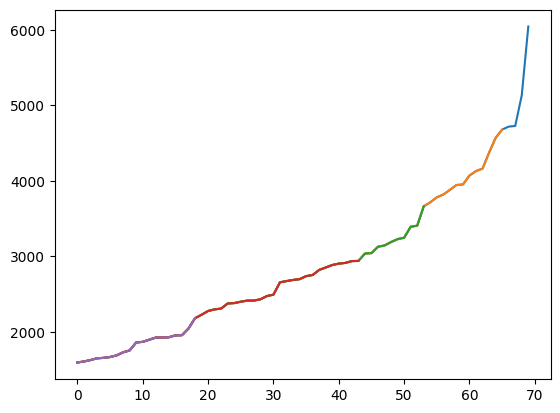

In [27]:
plt.plot((list(train.groupby('zipcode')['prix_m2'].mean().sort_values())))
plt.plot((list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[:66]))
plt.plot((list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[:54]))
plt.plot((list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[:44]))
plt.plot((list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[:19]))

In [28]:
print(list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[66])
print(list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[57])
print(list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[36])
print(list(train.groupby('zipcode')['prix_m2'].mean().sort_values())[20])

4717.068504079405
3878.6293718020297
2751.055145585218
2274.120029064116


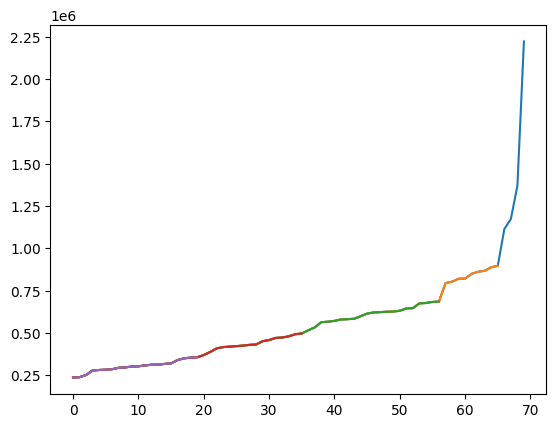

In [29]:
plt.plot((list(train.groupby('zipcode')['prix'].mean().sort_values())))
plt.plot((list(train.groupby('zipcode')['prix'].mean().sort_values())[:66]))
plt.plot((list(train.groupby('zipcode')['prix'].mean().sort_values())[:57]))
plt.plot((list(train.groupby('zipcode')['prix'].mean().sort_values())[:36]))
plt.plot((list(train.groupby('zipcode')['prix'].mean().sort_values())[:20]))

In [30]:
print(list(train.groupby('zipcode')['prix'].mean().sort_values())[66])
print(list(train.groupby('zipcode')['prix'].mean().sort_values())[57])
print(list(train.groupby('zipcode')['prix'].mean().sort_values())[36])
print(list(train.groupby('zipcode')['prix'].mean().sort_values())[20])

1113449.2976744187
794332.0592885376
515462.58086560364
369246.3347457627


In [31]:
a=list((train.groupby('zipcode')['prix_m2'].mean()[train.groupby('zipcode')['prix_m2'].mean()>=4717.068504079405]).index)

In [32]:
b=list((train.groupby('zipcode')['prix_m2'].mean()[(3878.6293718020297<=train.groupby('zipcode')['prix_m2'].mean())*(train.groupby('zipcode')['prix_m2'].mean()<4717.068504079405)]).index)

In [33]:
c=list((train.groupby('zipcode')['prix_m2'].mean()[(2751.055145585218<=train.groupby('zipcode')['prix_m2'].mean())*(train.groupby('zipcode')['prix_m2'].mean()<3878.6293718020297)]).index)

In [34]:
d=list((train.groupby('zipcode')['prix_m2'].mean()[(2274.120029064116<=train.groupby('zipcode')['prix_m2'].mean())*(train.groupby('zipcode')['prix_m2'].mean()<2751.055145585218)]).index)

In [35]:
e=list((train.groupby('zipcode')['prix_m2'].mean()[(train.groupby('zipcode')['prix_m2'].mean()<2274.120029064116)]).index)

In [36]:
def fonc(x):
    if x in a:
        return 0
    elif x in b:
        return 1
    elif x in c:
        return 2
    elif x in d:
        return 3
    elif x in e:
        return 4
    else:
        return 5

In [37]:
train['zipcode_cluster']=train['zipcode'].transform(lambda x: fonc(x))

In [38]:
test['zipcode_cluster']=test['zipcode'].transform(lambda x: fonc(x))

In [39]:
test['zipcode_cluster'].unique()

array([2, 4, 1, 3, 0], dtype=int64)

In [40]:
train=train.drop('zipcode',axis=1)
test=test.drop('zipcode',axis=1)

### Correlation

<Axes: >

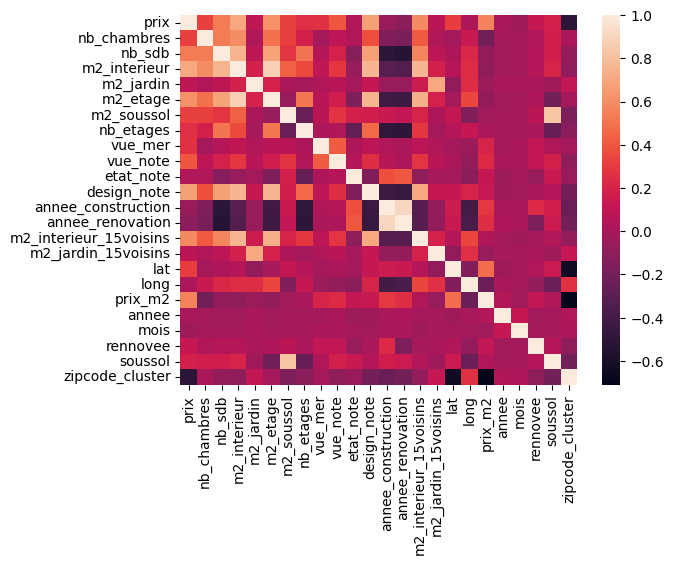

In [41]:
sns.heatmap(train.corr())

Map plot

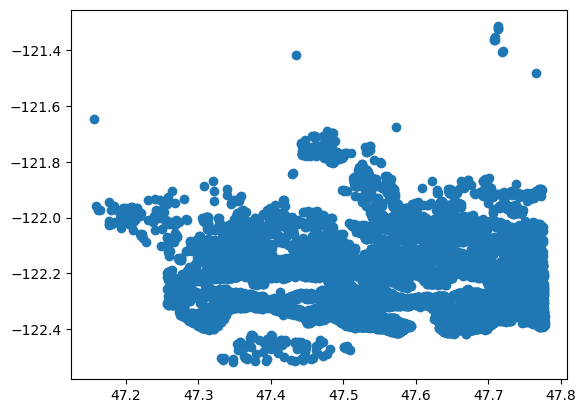

In [42]:
plt.scatter(train['lat'],train['long'])

### date et position pour feature engineering (densité ?)

In [43]:
"""pip install folium"""

'pip install folium'

In [44]:
"""import folium
from folium.plugins import MarkerCluster
import pandas as pd



# Create map
m = folium.Map(location=[47.5, -122], zoom_start=10)

# Add Marker Cluster
marker_cluster = MarkerCluster().add_to(m)

# Add points to cluster
for idx, row in train.iterrows():
    folium.Marker([row["lat"], row["long"]]).add_to(marker_cluster)

# Save and display
m.save("optimized_map.html")
m"""

'import folium\nfrom folium.plugins import MarkerCluster\nimport pandas as pd\n\n\n\n# Create map\nm = folium.Map(location=[47.5, -122], zoom_start=10)\n\n# Add Marker Cluster\nmarker_cluster = MarkerCluster().add_to(m)\n\n# Add points to cluster\nfor idx, row in train.iterrows():\n    folium.Marker([row["lat"], row["long"]]).add_to(marker_cluster)\n\n# Save and display\nm.save("optimized_map.html")\nm'

## Etude PCA

In [45]:
col_cluster=train.drop(['prix','prix_m2'],axis=1).columns

In [46]:
import sys
sys.path.append('C:/Users/morea/Downloads/')
import _analyse_facto as af

In [47]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'lat', 'long',
       'prix_m2', 'annee', 'mois', 'rennovee', 'soussol', 'zipcode_cluster'],
      dtype='object')

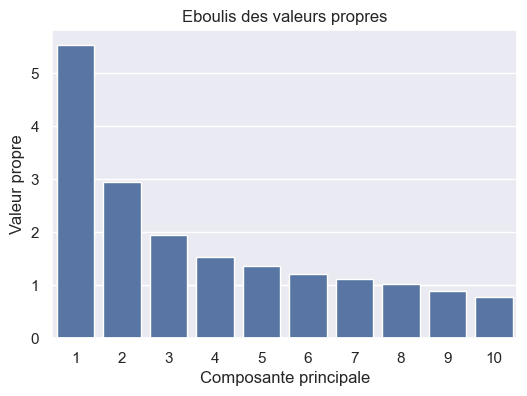

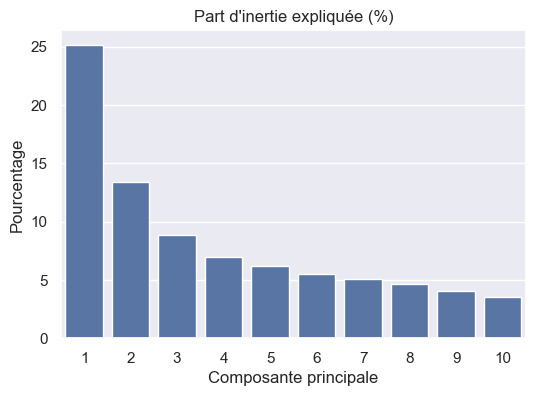

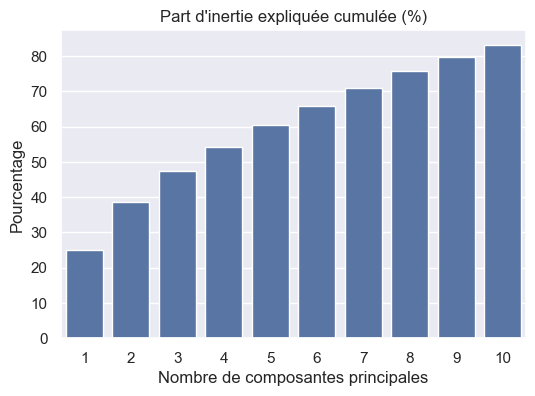

In [ ]:
"""acp_out, data_acp_out = af.ACP_interp(data_acp=train[col_cluster],
                                      acp_norm='oui',
                                      choix_n_cp='oui',
                                      cercle='non',
                                      projection='non', label_indiv='non',
                                      cp_x=1, cp_y=2)"""

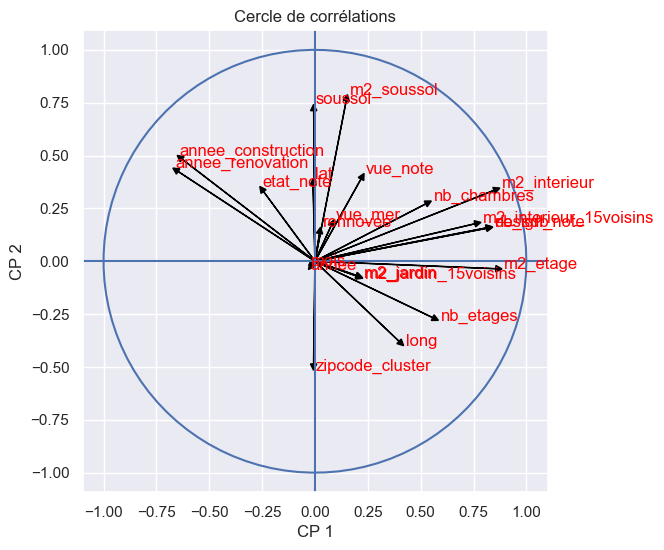

In [ ]:
"""acp_out, data_acp_out = af.ACP_interp(data_acp=train[col_cluster],
                                      acp_norm='oui',
                                      choix_n_cp='non',
                                      cercle='oui',
                                      projection='non', label_indiv='non',
                                      cp_x=1, cp_y=2)"""

## Cluster

In [50]:
train = pd.get_dummies(train, columns=['zipcode_cluster'], dtype='int', drop_first=False)
test = pd.get_dummies(test, columns=['zipcode_cluster'], dtype='int', drop_first=False)

In [51]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np


from sklearn.preprocessing import StandardScaler

In [52]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'lat', 'long',
       'prix_m2', 'annee', 'mois', 'rennovee', 'soussol', 'zipcode_cluster_0',
       'zipcode_cluster_1', 'zipcode_cluster_2', 'zipcode_cluster_3',
       'zipcode_cluster_4'],
      dtype='object')

In [53]:
col_cluster=train.drop(['prix','prix_m2'],axis=1).columns

In [54]:
#col_cluster=col_cluster[:-1]

In [55]:
col_cluster

Index(['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin', 'm2_etage',
       'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note',
       'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'lat', 'long', 'annee',
       'mois', 'rennovee', 'soussol', 'zipcode_cluster_0', 'zipcode_cluster_1',
       'zipcode_cluster_2', 'zipcode_cluster_3', 'zipcode_cluster_4'],
      dtype='object')

In [56]:
col_cluster=train.drop(['prix'],axis=1).columns


mean_std_scaler = StandardScaler().fit(train[col_cluster])
train_cluster = mean_std_scaler.transform(train[col_cluster])

In [57]:
mean_std_scaler = StandardScaler().fit(test)
test_cluster = mean_std_scaler.transform(test)

In [58]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [59]:
"""cah_model = AgglomerativeClustering(distance_threshold=0,
                                       metric='euclidean',
                                       linkage='ward',
                                       n_clusters=None)
cah = cah_model.fit(train_cluster)"""

"cah_model = AgglomerativeClustering(distance_threshold=0,\n                                       metric='euclidean',\n                                       linkage='ward',\n                                       n_clusters=None)\ncah = cah_model.fit(train_cluster)"

In [60]:
"""plt.subplots(figsize=(10, 6))
plt.title('CAH : distance euclidienne & stratégie de Ward')
# plot the top three levels of the dendrogram
plot_dendrogram(cah, truncate_mode="level", p=10)
plt.show()"""

'plt.subplots(figsize=(10, 6))\nplt.title(\'CAH : distance euclidienne & stratégie de Ward\')\n# plot the top three levels of the dendrogram\nplot_dendrogram(cah, truncate_mode="level", p=10)\nplt.show()'

In [61]:
n=train.shape[0]

In [62]:
"""k_max = 30

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(range(2, k_max+1), 0, np.flip(np.sort(cah.distances_))[0:k_max-1], linewidth=5)
ax.set_xticks(range(2, k_max+1))
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()"""

"k_max = 30\n\nfig, ax = plt.subplots(figsize=(8, 4))\nax.vlines(range(2, k_max+1), 0, np.flip(np.sort(cah.distances_))[0:k_max-1], linewidth=5)\nax.set_xticks(range(2, k_max+1))\nax.grid()\nax.set_xlabel('K')\nax.set_ylabel('Hauteur')\nplt.title('Passage de K à (K-1) clusters')\nplt.show()"

In [63]:
K = 3

cah_model = AgglomerativeClustering(metric='euclidean',
                                   linkage='ward',
                                   n_clusters=K)
cah = cah_model.fit(train_cluster)

train['cluster_cah_ward'] = cah.fit_predict(train_cluster)
train['cluster_cah_ward'].value_counts()

cluster_cah_ward
1    6572
0    6466
2    4106
Name: count, dtype: int64

In [64]:
test['cluster_cah_ward'] = cah.fit_predict(test_cluster)
test['cluster_cah_ward'].value_counts()

cluster_cah_ward
1    1829
0    1324
2    1134
Name: count, dtype: int64

In [65]:
"""fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(train['long'], train['lat'],c=train['cluster_cah_ward'],linewidths=0.2)"""

"fig, ax = plt.subplots(figsize=(12, 8))\nplt.scatter(train['long'], train['lat'],c=train['cluster_cah_ward'],linewidths=0.2)"

In [66]:
"""i=0
for stat in train.columns:
    plt.figure(i)
    plt.ylabel("prix")
    plt.xlabel(str(stat))
    plt.scatter(train[stat], train['prix'],c=train['cluster_cah_ward'])
    i+=1
plt.show()"""

'i=0\nfor stat in train.columns:\n    plt.figure(i)\n    plt.ylabel("prix")\n    plt.xlabel(str(stat))\n    plt.scatter(train[stat], train[\'prix\'],c=train[\'cluster_cah_ward\'])\n    i+=1\nplt.show()'

## Regression

In [67]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from statsmodels.tools import add_constant
import itertools 

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17144 entries, 0 to 17146
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   prix                    17144 non-null  int64  
 1   nb_chambres             17144 non-null  int64  
 2   nb_sdb                  17144 non-null  float64
 3   m2_interieur            17144 non-null  float64
 4   m2_jardin               17144 non-null  float64
 5   m2_etage                17144 non-null  float64
 6   m2_soussol              17144 non-null  float64
 7   nb_etages               17144 non-null  float64
 8   vue_mer                 17144 non-null  int64  
 9   vue_note                17144 non-null  int64  
 10  etat_note               17144 non-null  int64  
 11  design_note             17144 non-null  int64  
 12  annee_construction      17144 non-null  int64  
 13  annee_renovation        17144 non-null  int64  
 14  m2_interieur_15voisins  17144 non-null  flo

In [69]:
train = pd.get_dummies(train, columns=['cluster_cah_ward'], dtype='int', drop_first=False)
test = pd.get_dummies(test, columns=['cluster_cah_ward'], dtype='int', drop_first=False)

In [70]:
"""def AIC_BIC_linreg(X, y, features):
    linreg_model = OLS(y, X[list(features)])
    linreg = linreg_model.fit()
    AIC = linreg.aic
    BIC = linreg.bic
    return {'model':linreg, 'AIC':AIC, 'BIC':BIC}

def linreg_forward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results=[]
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]

    for p in remaining_predictors:
        results.append(AIC_BIC_linreg(X=X, y=y, features=predictors+[p]+['const']))
    models = pd.DataFrame(results)

    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]

    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)

    return best_model

def linreg_forward_proc(X, y, crit='BIC', verbose=True):
    forward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []

    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if forward_result[crit] > forward_model_before:
                break
        forward_models.loc[i] = forward_result
        predictors = forward_models.loc[i]['model'].model.exog_names
        forward_model_before = forward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']

    return(forward_models['model'][len(forward_models['model'])])


y=train['prix_m2']
X=train.drop(['prix','prix_m2'], axis=1)
linreg_forward = linreg_forward_proc(add_constant(X), y, crit='AIC', verbose=True)"""

"def AIC_BIC_linreg(X, y, features):\n    linreg_model = OLS(y, X[list(features)])\n    linreg = linreg_model.fit()\n    AIC = linreg.aic\n    BIC = linreg.bic\n    return {'model':linreg, 'AIC':AIC, 'BIC':BIC}\n\ndef linreg_forward_predictors(X, y, predictors, crit='BIC', verbose=True):\n    results=[]\n    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]\n\n    for p in remaining_predictors:\n        results.append(AIC_BIC_linreg(X=X, y=y, features=predictors+[p]+['const']))\n    models = pd.DataFrame(results)\n\n    if crit == 'AIC':\n        best_model = models.loc[models['AIC'].argmin()]\n    else:\n        best_model = models.loc[models['BIC'].argmin()]\n\n    if verbose == True:\n        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)\n\n    return best_model\n\ndef linreg_forward_proc(X, y, crit='BIC', verbose=True):\n    forward_models = pd.DataFrame(

juste pas soussol

In [71]:
len(['zipcode_cluster_4', 'zipcode_cluster_3', 'zipcode_cluster_2', 'vue_mer', 'nb_chambres', 'zipcode_cluster_0', 'cluster_cah_ward_2', 'vue_note', 'm2_soussol', 'lat', 'etat_note', 'annee', 'design_note', 'm2_etage', 'm2_interieur_15voisins', 'annee_construction', 'm2_jardin', 'rennovee', 'nb_sdb', 'nb_etages', 'cluster_cah_ward_0', 'mois', 'm2_jardin_15voisins', 'long', 'annee_renovation', 'cluster_cah_ward_1', 'zipcode_cluster_1'])

27

In [72]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'lat', 'long',
       'prix_m2', 'annee', 'mois', 'rennovee', 'soussol', 'zipcode_cluster_0',
       'zipcode_cluster_1', 'zipcode_cluster_2', 'zipcode_cluster_3',
       'zipcode_cluster_4', 'cluster_cah_ward_0', 'cluster_cah_ward_1',
       'cluster_cah_ward_2'],
      dtype='object')

In [73]:
"""def linreg_backward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results = []
    
    for combi in itertools.combinations(predictors, len(predictors)-1):
        results.append(AIC_BIC_linreg(X=X, y=y, features=list(combi)+['const']))
    models = pd.DataFrame(results)
    
    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]
    
    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)
    
    return best_model

def linreg_backward_proc(X, y, crit='BIC', verbose=True):
    backward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = list(X.columns.difference(['const']))
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if backward_result[crit] > backward_model_before:
                break
        backward_models.loc[i] = backward_result
        predictors = backward_models.loc[i]['model'].model.exog_names
        backward_model_before = backward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']
    
    return(backward_models['model'][len(backward_models['model'])])


y=train['prix_m2']
X=train.drop(['prix','prix_m2'], axis=1)
linreg_backward = linreg_backward_proc(add_constant(X), y, crit='AIC', verbose=True)"""

"def linreg_backward_predictors(X, y, predictors, crit='BIC', verbose=True):\n    results = []\n    \n    for combi in itertools.combinations(predictors, len(predictors)-1):\n        results.append(AIC_BIC_linreg(X=X, y=y, features=list(combi)+['const']))\n    models = pd.DataFrame(results)\n    \n    if crit == 'AIC':\n        best_model = models.loc[models['AIC'].argmin()]\n    else:\n        best_model = models.loc[models['BIC'].argmin()]\n    \n    if verbose == True:\n        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)\n    \n    return best_model\n\ndef linreg_backward_proc(X, y, crit='BIC', verbose=True):\n    backward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])\n    predictors = list(X.columns.difference(['const']))\n    \n    for i in range(1, len(X.columns.difference(['const'])) + 1):\n        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=c

pas zipcode cluster 4 et soussol

In [74]:
len(['annee', 'annee_construction', 'annee_renovation', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'design_note', 'etat_note', 'lat', 'long', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin', 'm2_jardin_15voisins', 'm2_soussol', 'mois', 'nb_chambres', 'nb_etages', 'nb_sdb', 'rennovee', 'vue_mer', 'vue_note', 'zipcode_cluster_0', 'zipcode_cluster_1', 'zipcode_cluster_2', 'zipcode_cluster_3'])

26

In [75]:
"""def linreg_stepwise_proc(X, y, crit='BIC', verbose=True):
    stepwise_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []
    stepwise_model_before = AIC_BIC_linreg(X, y, predictors+['const'])[crit]
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        stepwise_models.loc[i] = forward_result
        predictors = stepwise_models.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if backward_result[crit]< forward_result[crit]:
            stepwise_models.loc[i] = backward_result
            predictors = stepwise_models.loc[i]['model'].model.exog_names
            stepwise_model_before = stepwise_models.loc[i][crit]
            predictors = [k for k in predictors if k != 'const']
        if stepwise_models.loc[i][crit]> stepwise_model_before:
            break
        else:
            stepwise_model_before = stepwise_models.loc[i][crit]
        
    return(stepwise_models['model'][len(stepwise_models['model'])])


linreg_stepwise = linreg_stepwise_proc(add_constant(X), y, crit='AIC', verbose=True)"""

"def linreg_stepwise_proc(X, y, crit='BIC', verbose=True):\n    stepwise_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])\n    predictors = []\n    stepwise_model_before = AIC_BIC_linreg(X, y, predictors+['const'])[crit]\n    \n    for i in range(1, len(X.columns.difference(['const'])) + 1):\n        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)\n        stepwise_models.loc[i] = forward_result\n        predictors = stepwise_models.loc[i]['model'].model.exog_names\n        predictors = [k for k in predictors if k != 'const']\n        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)\n        if backward_result[crit]< forward_result[crit]:\n            stepwise_models.loc[i] = backward_result\n            predictors = stepwise_models.loc[i]['model'].model.exog_names\n            stepwise_model_before = stepwise_models.loc[i][crit]\n            predictors = [k for k in p

pas zipcode cluster 1 et soussol

In [76]:
len(['zipcode_cluster_4', 'zipcode_cluster_3', 'zipcode_cluster_2', 'vue_mer', 'nb_chambres', 'zipcode_cluster_0', 'cluster_cah_ward_2', 'vue_note', 'm2_soussol', 'lat', 'etat_note', 'annee', 'design_note', 'm2_etage', 'm2_interieur_15voisins', 'annee_construction', 'm2_jardin', 'rennovee', 'nb_sdb', 'nb_etages', 'cluster_cah_ward_0', 'mois', 'm2_jardin_15voisins', 'long', 'annee_renovation', 'cluster_cah_ward_1'])

26

In [77]:
train=train.drop('soussol',axis=1)
test=test.drop('soussol',axis=1)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [79]:
"""L_MSE=[]
L_RMSE=[]
L_MAPE=[]

for i in range(100):
  train_portion = 0.8
  train_wagon = (np.random.rand(train.shape[0]) < train_portion)
  data_train = train[train_wagon == True]
  X_test = train[train_wagon == False].drop(['prix_m2','prix'],axis=1)
  y_test = train[train_wagon == False]['prix']

  y=train[train_wagon == True]['prix_m2']
  X=train[train_wagon == True].drop(['prix_m2','prix'],axis=1)

  reg2 = OLS(y,X).fit()
  prediction=reg2.predict(X_test)
  X_test['prix_pred']=prediction*X_test['m2_interieur']
  MSE = mean_squared_error(y_test,X_test['prix_pred'])
  RMSE=np.sqrt(MSE)
  MAPE=mean_absolute_percentage_error(y_test, X_test['prix_pred'])
  L_MSE.append(MSE)
  L_RMSE.append(RMSE)
  L_MAPE.append(MAPE)

#print(np.argmin(L_MSE))

print(np.mean(L_MSE))
print(np.mean(L_RMSE))
print(np.mean(L_MAPE))"""

"L_MSE=[]\nL_RMSE=[]\nL_MAPE=[]\n\nfor i in range(100):\n  train_portion = 0.8\n  train_wagon = (np.random.rand(train.shape[0]) < train_portion)\n  data_train = train[train_wagon == True]\n  X_test = train[train_wagon == False].drop(['prix_m2','prix'],axis=1)\n  y_test = train[train_wagon == False]['prix']\n\n  y=train[train_wagon == True]['prix_m2']\n  X=train[train_wagon == True].drop(['prix_m2','prix'],axis=1)\n\n  reg2 = OLS(y,X).fit()\n  prediction=reg2.predict(X_test)\n  X_test['prix_pred']=prediction*X_test['m2_interieur']\n  MSE = mean_squared_error(y_test,X_test['prix_pred'])\n  RMSE=np.sqrt(MSE)\n  MAPE=mean_absolute_percentage_error(y_test, X_test['prix_pred'])\n  L_MSE.append(MSE)\n  L_RMSE.append(RMSE)\n  L_MAPE.append(MAPE)\n\n#print(np.argmin(L_MSE))\n\nprint(np.mean(L_MSE))\nprint(np.mean(L_RMSE))\nprint(np.mean(L_MAPE))"

In [80]:
train.mean()

prix                      542938.537331
nb_chambres                    3.369809
nb_sdb                         2.122827
m2_interieur                 193.697953
m2_jardin                   1403.193264
m2_etage                     166.643029
m2_soussol                    27.054924
nb_etages                      1.497725
vue_mer                        0.007991
vue_note                       0.235009
etat_note                      3.409239
design_note                    7.668514
annee_construction         -1980.836036
annee_renovation           -1983.263649
m2_interieur_15voisins       184.846222
m2_jardin_15voisins         1185.238303
lat                           47.560143
long                        -122.213740
prix_m2                     2849.575280
annee                         -9.677613
mois                          -0.150022
rennovee                       0.043105
zipcode_cluster_0              0.035114
zipcode_cluster_1              0.131008
zipcode_cluster_2              0.344669


## Regression regularisée

In [81]:
import pandas as pd # Pour lire les fichiers
import numpy as np # Pour effectuer des calculs mathématiques
import matplotlib.pyplot as plt # Pour réaliser des graphiques

from sklearn.preprocessing import StandardScaler # Pour la normalisation des données
from sklearn.model_selection import train_test_split # Pour le découpage apprentissage/test
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Pour les critères d'erreur
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

from sklearn.linear_model import Ridge, RidgeCV # Pour la régression ridge
from sklearn.linear_model import Lasso, LassoCV # Pour la régression LASSO
from sklearn.linear_model import ElasticNet, ElasticNetCV # Pour la régression elastic net

In [82]:
data = train.drop('prix',axis=1)
print('Dimensions du jeu de données :', data.shape)

Dimensions du jeu de données : (17144, 29)


### 2. Création d'un jeu de données d'apprentissage et de test

In [83]:
target = 'prix_m2'
features = list(data.columns.difference([target]))

test_portion = 1/5

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

print('Dimensions X_train:', X_train.shape)
print('Dimensions y_train:', y_train.shape)
print('Dimensions X_test:', X_test.shape)
print('Dimensions y_test:', y_test.shape)

mean_std_scaler = StandardScaler().fit(X_train)

X_train_sc = mean_std_scaler.transform(X_train)
X_test_sc = mean_std_scaler.transform(X_test)

Dimensions X_train: (13715, 28)
Dimensions y_train: (13715,)
Dimensions X_test: (3429, 28)
Dimensions y_test: (3429,)


### 3. Normalisation des covariables

### 4.1. Ridge

In [84]:
ridge_grid = RidgeCV(alphas=np.linspace(start=1e-12, stop=100, num=1000)).fit(X_train_sc, y_train)

alpha_opt = ridge_grid.alpha_
print('Hyperparamètre optimal :', alpha_opt)

ridge_model = Ridge(alpha_opt)
ridge = ridge_model.fit(X_train_sc, y_train)

y_test_pred_ridge = ridge.predict(X_test_sc)

RMSE_ridge = np.sqrt(mean_squared_error(y_test*X_test['m2_interieur'], y_test_pred_ridge*X_test['m2_interieur']))
print(f'RMSE Ridge : {RMSE_ridge:.2f}')

MAPE_ridge = mean_absolute_percentage_error(y_test*X_test['m2_interieur'], y_test_pred_ridge*X_test['m2_interieur']) * 100
print(f'MAPE Ridge : {MAPE_ridge:.2f}')

Hyperparamètre optimal : 60.86086086086126
RMSE Ridge : 150597.84
MAPE Ridge : 17.40


In [85]:
RMSE_list=[]
opt_ridge=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

    mean_std_scaler = StandardScaler().fit(X_train)

    X_train_sc = mean_std_scaler.transform(X_train)
    X_test_sc = mean_std_scaler.transform(X_test)

    ridge_grid = RidgeCV(alphas=np.linspace(start=1e-12, stop=100, num=1000)).fit(X_train_sc, y_train)

    alpha_opt = ridge_grid.alpha_
    print('Hyperparamètre optimal :', alpha_opt)

    ridge_model = Ridge(alpha_opt)
    ridge = ridge_model.fit(X_train_sc, y_train)

    y_test_pred_ridge = ridge.predict(X_test_sc)

    RMSE_ridge = np.sqrt(mean_squared_error(y_test*X_test['m2_interieur'], y_test_pred_ridge*X_test['m2_interieur']))
    RMSE_list.append(RMSE_ridge)
    opt_ridge.append(alpha_opt)

Hyperparamètre optimal : 53.653653653654125
Hyperparamètre optimal : 56.4564564564569
Hyperparamètre optimal : 53.753753753754225
Hyperparamètre optimal : 57.35735735735779
Hyperparamètre optimal : 56.556556556557
Hyperparamètre optimal : 54.25425425425472
Hyperparamètre optimal : 50.950950950951444
Hyperparamètre optimal : 48.24824824824877
Hyperparamètre optimal : 46.946946946947484
Hyperparamètre optimal : 55.855855855856305


In [86]:
print(np.mean(RMSE_list))
print(np.mean(opt_ridge))

159025.27325191902
53.40340340340388


In [87]:
mean_std_scaler = StandardScaler().fit(train.drop(['prix','prix_m2'],axis=1))

X_train_sc = mean_std_scaler.transform(train.drop(['prix','prix_m2'],axis=1))
X_test_sc = mean_std_scaler.transform(test)

ridge_grid = RidgeCV(alphas=np.linspace(start=1e-12, stop=100, num=1000)).fit(X_train_sc, train['prix_m2'])

alpha_opt = ridge_grid.alpha_
print('Hyperparamètre optimal :', alpha_opt)

ridge_model = Ridge(alpha_opt)
ridge = ridge_model.fit(X_train_sc, train['prix_m2'])

y_test_pred_ridge = ridge.predict(X_test_sc)

test['prix_pred']=y_test_pred_ridge*test['m2_interieur']


Hyperparamètre optimal : 54.95495495495541


In [88]:
ids['prix']=test['prix_pred']

In [89]:
ids

,id,prix
0,3600072,5.994704e+05
1,6200017,1.859650e+05
2,7600136,4.499392e+05
3,11200400,5.243231e+05
4,11500890,1.011535e+06
...,...,...
4282,9834200975,5.023203e+05
4283,9834201370,4.021423e+05
4284,9835801000,2.947598e+05
4285,9839300125,6.969283e+05


In [90]:
ids.to_csv('C:/Users/morea/OneDrive/Documents/2A/PRAMA/PRAMA/Ridge_submission.csv',index=False)

### 4.2. LASSO

In [91]:
test=test.drop('prix_pred',axis=1)

In [92]:
target = 'prix_m2'
features = list(data.columns.difference([target]))

test_portion = 1/5

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

print('Dimensions X_train:', X_train.shape)
print('Dimensions y_train:', y_train.shape)
print('Dimensions X_test:', X_test.shape)
print('Dimensions y_test:', y_test.shape)

mean_std_scaler = StandardScaler().fit(X_train)

X_train_sc = mean_std_scaler.transform(X_train)
X_test_sc = mean_std_scaler.transform(X_test)

Dimensions X_train: (13715, 28)
Dimensions y_train: (13715,)
Dimensions X_test: (3429, 28)
Dimensions y_test: (3429,)


In [93]:
lasso_grid = LassoCV(alphas=np.linspace(start=1e-10, stop=1, num=1000)).fit(X_train_sc, y_train)

alpha_opt = lasso_grid.alpha_
print('Hyperparamètre optimal :', alpha_opt)

lasso_model = Lasso(alpha_opt)
lasso = lasso_model.fit(X_train_sc, y_train)

y_test_pred_lasso = lasso.predict(X_test_sc)

RMSE_lasso = np.sqrt(mean_squared_error(y_test*X_test['m2_interieur'], y_test_pred_lasso*X_test['m2_interieur']))
print(f'RMSE LASSO : {RMSE_lasso:.2f}')

MAPE_lasso = mean_absolute_percentage_error(y_test*X_test['m2_interieur'], y_test_pred_lasso*X_test['m2_interieur']) * 100
print(f'MAPE LASSO : {MAPE_lasso:.2f}')

C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9570900.948338509, tolerance: 1549578.3951711936
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437744129.63138723, tolerance: 1549578.3951711936
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWa

Hyperparamètre optimal : 0.5895895896306307
RMSE LASSO : 146674.00
MAPE LASSO : 17.38


C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 1.931e+06
  model = cd_fast.enet_coordinate_descent(


### 4.3. Elastic Net

In [94]:
elasticnet_grid = ElasticNetCV(l1_ratio=0.5, alphas=np.linspace(start=1e-10, stop=1, num=1000)).fit(X_train_sc, y_train)

alpha_opt = elasticnet_grid.alpha_
print('Hyperparamètre optimal :', alpha_opt)

elasticnet_model = ElasticNet(l1_ratio=0.5, alpha=alpha_opt)
elasticnet = elasticnet_model.fit(X_train_sc, y_train)

y_test_pred_elasticnet = elasticnet.predict(X_test_sc)

RMSE_elasticnet = np.sqrt(mean_squared_error(y_test*X_test['m2_interieur'], y_test_pred_elasticnet*X_test['m2_interieur']))
print(f'RMSE Elastic Net : {RMSE_elasticnet:.2f}')

MAPE_elasticnet = mean_absolute_percentage_error(y_test*X_test['m2_interieur'], y_test_pred_elasticnet*X_test['m2_interieur']) * 100
print(f'MAPE Elastic Net : {MAPE_elasticnet:.2f}')

C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10401366.390646935, tolerance: 1549578.3951711936
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83220855.28052521, tolerance: 1549578.3951711936
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\morea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWa

Hyperparamètre optimal : 0.009009009108108108
RMSE Elastic Net : 146551.95
MAPE Elastic Net : 17.39


### 4.4. Synthèse

In [95]:
RMSE_model = {}

RMSE_model['Ridge'] = RMSE_ridge
RMSE_model['LASSO'] = RMSE_lasso
RMSE_model['Elastic Net'] = RMSE_elasticnet

RMSE_model

{'Ridge': 149397.71842197992,
 'LASSO': 146674.00208754462,
 'Elastic Net': 146551.95271325807}

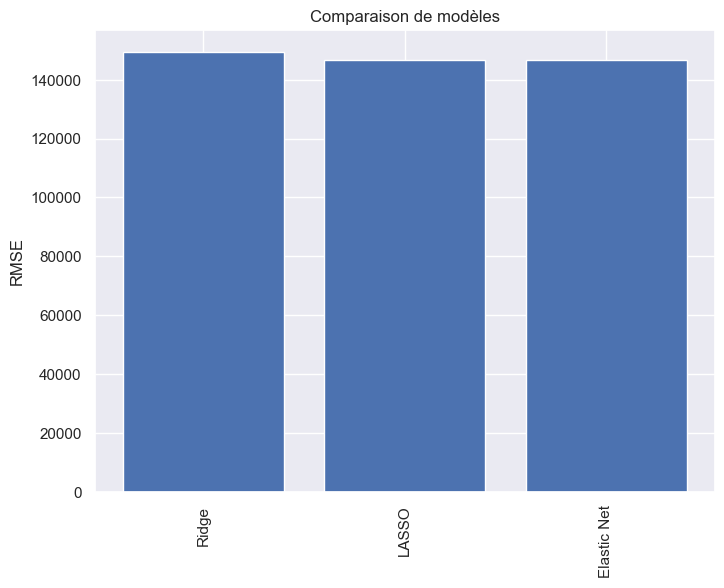

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(RMSE_model.keys(), RMSE_model.values())
#ax.grid()
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('RMSE')

plt.title('Comparaison de modèles')
plt.show()

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
"""L=[]
for i in range(10):
    train_portion = 0.8
    train_wagon = (np.random.rand(train.shape[0]) < train_portion)
    data_train = train[train_wagon == True]
    X_test = train[train_wagon == False].drop(['prix','prix_m2'],axis=1)
    y_test = train[train_wagon == False]['prix']

    y=train[train_wagon == True]['prix_m2']
    X=train[train_wagon == True].drop(['prix','prix_m2'],axis=1)

    model_RFR = RandomForestRegressor(random_state=0)

    model_RFR.fit(X,y)
    Y_pred_for_test=model_RFR.predict(X_test)

    L.append(np.sqrt(mean_squared_error(y_test,Y_pred_for_test*X_test['m2_interieur'])))

    print(np.mean(L))
    print(np.min(L))
"""

"L=[]\nfor i in range(10):\n    train_portion = 0.8\n    train_wagon = (np.random.rand(train.shape[0]) < train_portion)\n    data_train = train[train_wagon == True]\n    X_test = train[train_wagon == False].drop(['prix','prix_m2'],axis=1)\n    y_test = train[train_wagon == False]['prix']\n\n    y=train[train_wagon == True]['prix_m2']\n    X=train[train_wagon == True].drop(['prix','prix_m2'],axis=1)\n\n    model_RFR = RandomForestRegressor(random_state=0)\n\n    model_RFR.fit(X,y)\n    Y_pred_for_test=model_RFR.predict(X_test)\n\n    L.append(np.sqrt(mean_squared_error(y_test,Y_pred_for_test*X_test['m2_interieur'])))\n\n    print(np.mean(L))\n    print(np.min(L))\n"

In [ ]:
#test=test.drop('prix_pred',axis=1)

In [109]:
model_RFR = RandomForestRegressor(random_state=0)
model_RFR.fit(train.drop(['prix','prix_m2'],axis=1), train['prix_m2'])

y_test_pred_ridge = model_RFR.predict(test)

test['prix_pred']=y_test_pred_ridge*test['m2_interieur']

In [116]:
test.columns

Index(['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin', 'm2_etage',
       'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note',
       'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'lat', 'long', 'annee',
       'mois', 'rennovee', 'zipcode_cluster_0', 'zipcode_cluster_1',
       'zipcode_cluster_2', 'zipcode_cluster_3', 'zipcode_cluster_4',
       'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2',
       'prix_pred'],
      dtype='object')

In [129]:
target = 'prix_m2'
features = list(train.columns.difference([target]))

test_portion = 1/5

X = train[features].drop('prix',axis=1)
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

print('Dimensions X_train:', X_train.shape)
print('Dimensions y_train:', y_train.shape)
print('Dimensions X_test:', X_test.shape)
print('Dimensions y_test:', y_test.shape)

Dimensions X_train: (13715, 28)
Dimensions y_train: (13715,)
Dimensions X_test: (3429, 28)
Dimensions y_test: (3429,)


In [142]:
model_RFR = RandomForestRegressor(random_state=0)
model_RFR.fit(X_train, y_train)

y_test_pred_ridge = model_RFR.predict(X_test)

In [143]:
RMSE_elasticnet = np.sqrt(mean_squared_error(y_test*X_test['m2_interieur'], y_test_pred_ridge*X_test['m2_interieur']))
print(f'RMSE : {RMSE_elasticnet:.2f}')

MAPE_elasticnet = mean_absolute_percentage_error(y_test*X_test['m2_interieur'], y_test_pred_ridge*X_test['m2_interieur']) * 100
print(f'MAPE : {MAPE_elasticnet:.2f}')

RMSE : 119313.83
MAPE : 12.56


In [110]:
importances=model_RFR.feature_importances_

indices = np.argsort(importances)[::-1]

for i in indices:
    print(f"Feature {train.drop(['prix','prix_m2'],axis=1).columns[i]}: Importance {importances[i]:.4f}")

Feature lat: Importance 0.3635
Feature m2_interieur: Importance 0.1144
Feature zipcode_cluster_1: Importance 0.0723
Feature zipcode_cluster_0: Importance 0.0692
Feature long: Importance 0.0433
Feature vue_mer: Importance 0.0428
Feature zipcode_cluster_2: Importance 0.0344
Feature m2_interieur_15voisins: Importance 0.0296
Feature m2_jardin: Importance 0.0280
Feature m2_soussol: Importance 0.0253
Feature m2_jardin_15voisins: Importance 0.0212
Feature vue_note: Importance 0.0195
Feature annee_construction: Importance 0.0191
Feature m2_etage: Importance 0.0173
Feature design_note: Importance 0.0166
Feature annee_renovation: Importance 0.0161
Feature cluster_cah_ward_2: Importance 0.0130
Feature mois: Importance 0.0081
Feature zipcode_cluster_3: Importance 0.0080
Feature etat_note: Importance 0.0080
Feature nb_chambres: Importance 0.0078
Feature nb_sdb: Importance 0.0078
Feature nb_etages: Importance 0.0045
Feature annee: Importance 0.0042
Feature zipcode_cluster_4: Importance 0.0039
Featur

In [106]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'lat', 'long',
       'prix_m2', 'annee', 'mois', 'rennovee', 'zipcode_cluster_0',
       'zipcode_cluster_1', 'zipcode_cluster_2', 'zipcode_cluster_3',
       'zipcode_cluster_4', 'cluster_cah_ward_0', 'cluster_cah_ward_1',
       'cluster_cah_ward_2'],
      dtype='object')

In [117]:
ids['prix']=test['prix_pred']

In [118]:
ids.to_csv('C:/Users/morea/OneDrive/Documents/2A/PRAMA/PRAMA/RFR_prix_submission.csv',index=False)

In [ ]:
"""from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2',20]
}

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)
random_search.fit(train.drop(['prix','prix_m2'],axis=1), train['prix_m2'])


print(random_search.best_params_)"""

"from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\nparam_dist = {\n    'n_estimators': randint(50, 500),\n    'max_depth': randint(5, 50),\n    'min_samples_split': randint(2, 20),\n    'min_samples_leaf': randint(1, 10),\n    'max_features': ['sqrt', 'log2',20]\n}\n\nrf = RandomForestRegressor()\nrandom_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)\nrandom_search.fit(train.drop(['prix','prix_m2'],axis=1), train['prix_m2'])\n\n\nprint(random_search.best_params_)"

In [ ]:
{'max_depth': 49, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 301}

{'max_depth': 49,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 301}

## Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
L=[]
for i in range(10):
    train_portion = 0.8
    train_wagon = (np.random.rand(train.shape[0]) < train_portion)
    
    X_test = train[train_wagon == False].drop(['prix','prix_m2'],axis=1)
    y_test = train[train_wagon == False]['prix']

    y=train[train_wagon == True]['prix_m2']
    X=train[train_wagon == True].drop(['prix','prix_m2'],axis=1)

    model_XGBoost = GradientBoostingRegressor(random_state=0)

    model_XGBoost.fit(X,y)
    Y_pred_for_test=model_XGBoost.predict(X_test)

    L.append(np.sqrt(mean_squared_error(y_test,Y_pred_for_test*X_test['m2_interieur'])))

    print(np.mean(L))
    print(np.min(L))


114914.02525928253
114914.02525928253
118835.97199302437
114914.02525928253
123435.0148424268
114914.02525928253
125150.5834210508
114914.02525928253
122718.90122951672
112992.17246338038
123008.24730313492
112992.17246338038
123565.55975043004
112992.17246338038
123939.95837157342
112992.17246338038
123403.60250368541
112992.17246338038
123195.40003783442
112992.17246338038


In [87]:
target = 'prix_m2'
features = list(train.columns.difference([target]))

test_portion = 1/5

X = train[features].drop('prix',axis=1)
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

print('Dimensions X_train:', X_train.shape)
print('Dimensions y_train:', y_train.shape)
print('Dimensions X_test:', X_test.shape)
print('Dimensions y_test:', y_test.shape)

Dimensions X_train: (13715, 28)
Dimensions y_train: (13715,)
Dimensions X_test: (3429, 28)
Dimensions y_test: (3429,)
